In [9]:
from aws import *
import json


def read_json(json_file):
    with open(json_file) as f:
        return json.load(f)


wd = '/Users/danielmsheehan/Dropbox/General_Assembly/Projects/project_5/data'
config = read_json('config.json')

for g in ['sp', 'rj']:
    local_file = f"{wd}/output/{g}_master.csv"
    s3_filename = f"{g}_master.csv"
    
    file_to_s3(
        s3_session_connect(
            aws_connect(config['access_key_id'], config['secret_access_key'])
        ),
        'general-assembly-project-5',
        local_file,
        s3_filename,
    )

    link = f'https://general-assembly-project-5.s3.amazonaws.com/{g}_master.csv'
    print('    aws url: {}'.format(link))


    aws url: https://general-assembly-project-5.s3.amazonaws.com/sp_master.csv
    aws url: https://general-assembly-project-5.s3.amazonaws.com/rj_master.csv


In [10]:
import pandas as pd

# df = pd.read_csv('https://general-assembly-project-5.s3.amazonaws.com/sp_master.csv')



wd = '/Users/danielmsheehan/Dropbox/General_Assembly/Projects/project_5/data'
# config = read_json('config.json')

df = pd.read_csv(f"{wd}/output/sp_master.csv")

df.head()

,cd_geocodi,nm_subdist,nm_distrit,nm_municip,nm_micro,nm_meso,id1,geog_orig_area,favela_present,favela_area_squaremeters,...,brazil_store_near_angle,brazil_store_near_price,sp_brazil_store_kernel_density,brazil_ph_count_listings,brazil_ph_near_fid,brazil_ph_near_dist,brazil_ph_near_angle,brazil_ph_near_price,sp_brazil_ph_kernel_density,population_estimate
0,350570810000023,,ALDEIA,BARUERI,OSASCO,METROPOLITANA DE STO PAULO,4151,2.257383e+05,0.0,0.0,...,-0.026392,1200.0,0.003540,0.0,31,8889.189773,-158.493799,2500.0,0.0,1164.570831
1,350570810000025,,ALDEIA,BARUERI,OSASCO,METROPOLITANA DE STO PAULO,4153,3.926667e+04,0.0,0.0,...,-2.042826,1200.0,0.000000,0.0,31,8546.979457,-156.899284,2500.0,0.0,413.065460
2,350570805000043,,BARUERI,BARUERI,OSASCO,METROPOLITANA DE SuO PAULO,4380,3.925101e+04,0.0,0.0,...,177.898449,550.0,0.000000,0.0,31,17668.657905,-146.372789,2500.0,0.0,424.170563
3,350570805000056,,BARUERI,BARUERI,OSASCO,METROPOLITANA DE SuO PAULO,4393,7.136625e+04,0.0,0.0,...,-86.225561,7560.0,0.532356,0.0,31,14395.394220,-159.666627,2500.0,0.0,272.054306
4,350570805000057,,BARUERI,BARUERI,OSASCO,METROPOLITANA DE SuO PAULO,4394,1.264789e+06,0.0,0.0,...,0.000000,7560.0,0.505313,0.0,31,13056.248015,-160.753356,2500.0,0.0,2401.068539


In [11]:
for i in df.columns:
    print(i)

cd_geocodi
nm_subdist
nm_distrit
nm_municip
nm_micro
nm_meso
id1
geog_orig_area
favela_present
favela_area_squaremeters
sao_paulo_apartment_count_listings
sao_paulo_apartment_near_fid
sao_paulo_apartment_near_dist
sao_paulo_apartment_near_angle
sao_paulo_apartment_near_price
sp_sao_paulo_apartment_kernel_density
brazil_apartment_count_listings
brazil_apartment_near_fid
brazil_apartment_near_dist
brazil_apartment_near_angle
brazil_apartment_near_price
sp_brazil_apartment_kernel_density
brazil_house_count_listings
brazil_house_near_fid
brazil_house_near_dist
brazil_house_near_angle
brazil_house_near_price
sp_brazil_house_kernel_density
brazil_store_count_listings
brazil_store_near_fid
brazil_store_near_dist
brazil_store_near_angle
brazil_store_near_price
sp_brazil_store_kernel_density
brazil_ph_count_listings
brazil_ph_near_fid
brazil_ph_near_dist
brazil_ph_near_angle
brazil_ph_near_price
sp_brazil_ph_kernel_density
population_estimate


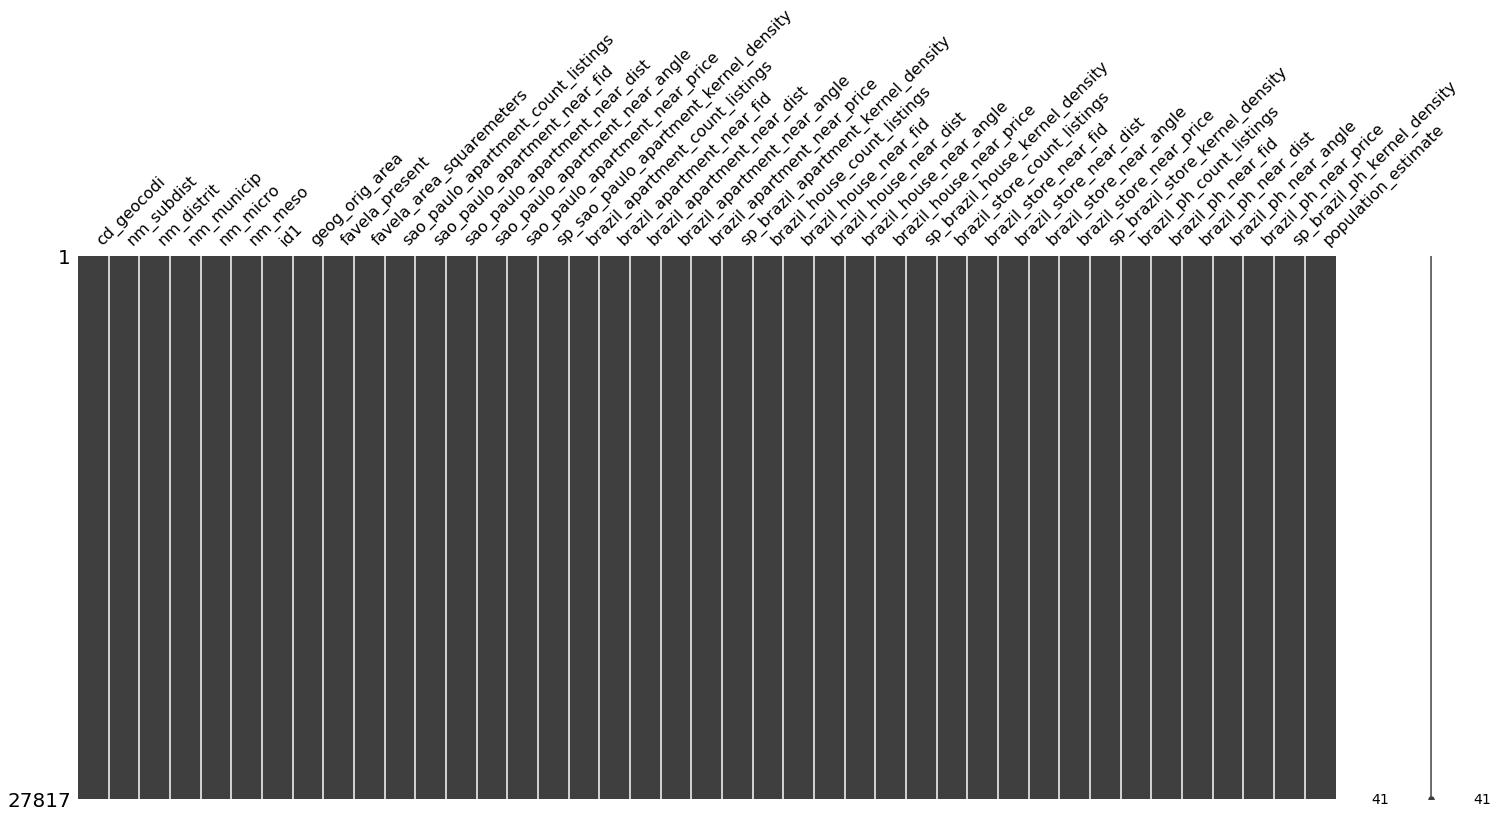

In [12]:
# df.fillna(0, inplace=True)
import missingno as msno
msno.matrix(df)

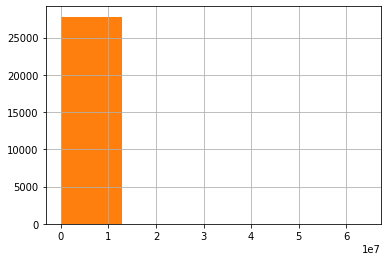

In [13]:
df.shape
df['brazil_apartment_near_price'].hist(bins=30)
df['geog_orig_area'].hist(bins=5)

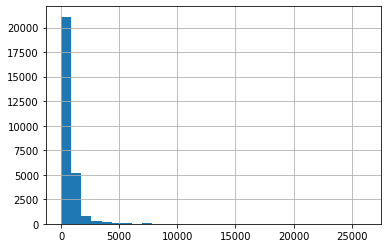

In [14]:
df['population_estimate'].hist(bins=30)

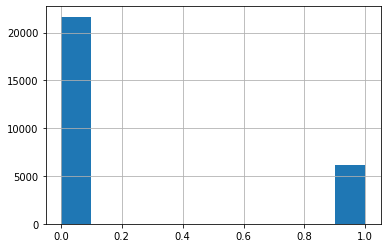

In [15]:
df['favela_present'].hist()

In [16]:
df['favela_present'].value_counts()

0.0    21658
1.0     6159
Name: favela_present, dtype: int64

In [17]:
df['favela_present'].value_counts(normalize=True)

0.0    0.778589
1.0    0.221411
Name: favela_present, dtype: float64

In [18]:
df.isnull().sum()

cd_geocodi                               0
nm_subdist                               0
nm_distrit                               0
nm_municip                               0
nm_micro                                 0
nm_meso                                  0
id1                                      0
geog_orig_area                           0
favela_present                           0
favela_area_squaremeters                 0
sao_paulo_apartment_count_listings       0
sao_paulo_apartment_near_fid             0
sao_paulo_apartment_near_dist            0
sao_paulo_apartment_near_angle           0
sao_paulo_apartment_near_price           0
sp_sao_paulo_apartment_kernel_density    0
brazil_apartment_count_listings          0
brazil_apartment_near_fid                0
brazil_apartment_near_dist               0
brazil_apartment_near_angle              0
brazil_apartment_near_price              0
sp_brazil_apartment_kernel_density       0
brazil_house_count_listings              0
brazil_hous

In [19]:
df.head(50)

,cd_geocodi,nm_subdist,nm_distrit,nm_municip,nm_micro,nm_meso,id1,geog_orig_area,favela_present,favela_area_squaremeters,...,brazil_store_near_angle,brazil_store_near_price,sp_brazil_store_kernel_density,brazil_ph_count_listings,brazil_ph_near_fid,brazil_ph_near_dist,brazil_ph_near_angle,brazil_ph_near_price,sp_brazil_ph_kernel_density,population_estimate
0,350570810000023,,ALDEIA,BARUERI,OSASCO,METROPOLITANA DE STO PAULO,4151,2.257383e+05,0.0,0.0,...,-0.026392,1200.0,0.003540,0.0,31,8889.189773,-158.493799,2500.0,0.0,1164.570831
1,350570810000025,,ALDEIA,BARUERI,OSASCO,METROPOLITANA DE STO PAULO,4153,3.926667e+04,0.0,0.0,...,-2.042826,1200.0,0.000000,0.0,31,8546.979457,-156.899284,2500.0,0.0,413.065460
2,350570805000043,,BARUERI,BARUERI,OSASCO,METROPOLITANA DE SuO PAULO,4380,3.925101e+04,0.0,0.0,...,177.898449,550.0,0.000000,0.0,31,17668.657905,-146.372789,2500.0,0.0,424.170563
3,350570805000056,,BARUERI,BARUERI,OSASCO,METROPOLITANA DE SuO PAULO,4393,7.136625e+04,0.0,0.0,...,-86.225561,7560.0,0.532356,0.0,31,14395.394220,-159.666627,2500.0,0.0,272.054306
4,350570805000057,,BARUERI,BARUERI,OSASCO,METROPOLITANA DE SuO PAULO,4394,1.264789e+06,0.0,0.0,...,0.000000,7560.0,0.505313,0.0,31,13056.248015,-160.753356,2500.0,0.0,2401.068539
5,350570805000058,,BARUERI,BARUERI,OSASCO,METROPOLITANA DE SuO PAULO,4395,7.240067e+05,0.0,0.0,...,173.434116,1800.0,0.507846,0.0,31,14583.733810,-159.794116,2500.0,0.0,1498.685143
6,350570805000059,,BARUERI,BARUERI,OSASCO,METROPOLITANA DE SuO PAULO,4396,2.205711e+05,0.0,0.0,...,-96.305960,1800.0,0.519257,0.0,31,15068.051897,-156.161075,2500.0,0.0,446.005376
7,350570805000060,,BARUERI,BARUERI,OSASCO,METROPOLITANA DE SuO PAULO,4397,7.866888e+05,0.0,0.0,...,-95.102395,7000.0,0.456941,0.0,31,14941.034671,-161.073476,2500.0,0.0,1229.536555
8,350570805000061,,BARUERI,BARUERI,OSASCO,METROPOLITANA DE SuO PAULO,4398,3.039689e+04,0.0,0.0,...,-88.530011,3000.0,0.000000,0.0,31,14244.848395,-156.412929,2500.0,0.0,221.554916
9,350570805000062,,BARUERI,BARUERI,OSASCO,METROPOLITANA DE SuO PAULO,4399,2.482404e+06,0.0,0.0,...,0.000000,2000.0,0.542319,0.0,31,12734.036329,-157.131030,2500.0,0.0,1590.946285


In [ ]:
df.hist(df['sp_brazil_ph_kernel_density)